# **Apple Stock Prediction using Time Series Analysis**
The Time Series data is sequence of data points collected at different timestamps. In mathematics, it is a series of data points indexed in a time order and the order could be in Years, Months, Weeks, Days, Horus, Minutes or Seconds. The Time Series Analysis is a specific way of analyzing these sequence of data points gathered over an interval of time. 

# Key Points
1. Models like Auto Regressive (AR), Moving Average (MA), Auto Regressive Moving Average (ARMA) and Auto Regressive Integrated Moving Average (ARIMA) could be deployed to predict the future.

2. The time-series models can be univariate or multivariate. The univariate time series models are implemented when the dependent variable is a single time series, like room temperature measurement from a single sensor. On the other hand, a multivariate time series model can be used when there are multiple dependent variables, i.e., the output depends on more than one series. An example for the multivariate time-series model could be modelling the GDP, inflation, and unemployment together as these variables are linked to each other.

3. A stationary series is one where the values of the series is not a function of time. I.e., the statistical properties of the series such as mean, variance and autocorrelation are constant over time. A stationary time series is not affeccted by seasonal trends.

4. The nonstationary time series include time trends, random walks( also called unit-roots) and seasonalities. Time trends reflect the feature of the time series to grow over time. 

5. Seasonalities occur due to change in the time series over different seasons such as each quarter. In other words, components of seasonality exhibit trends that repeat with respect to timing, direction, and magnitude. For instance, an increase in water consumption in summer due to hot weather conditions.

6. Trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

7. The Cyclical components are trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

8. The iIrregular variation is a fluctuation in the time series data that occurs when trend and cyclical variations are removed. The variation is unpredictable, erratic, and may or may not be random.

9. The specification could involve the testing of the linear or non-linear relationships of dependent variables using time series models such as ARIMA models.

10. In python, they are libraries that could help in performing time series analysis. They include: Tsfresh, Darts, GreyKite, Kats, AutoTS, etc,.    


In [3]:
#Load important Liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')

# **Dataset**
The data used in this project consist of APPLE's STOCK from 1980-2021. Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue (totaling $274.5 billion in 2020) and, since January 2021, the world's most valuable company. As of 2021, Apple is the world's fourth-largest PC vendor by unit sales, and fourth-largest smartphone manufacturer It is one of the Big Five American information technology companies, along with Amazon, Google, Microsoft, and Facebook.

In [4]:
Apple_df = pd.read_csv('Apple Stock.csv')

To understand the data, let's perform some EDA and data cleaning

In [5]:
Apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [6]:
Apple_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [7]:
Apple_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [8]:
Apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [9]:
#From the result above, the date format is not correct, therefore,
Apple_df['Date'] = pd.to_datetime(Apple_df['Date'])
type(Apple_df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#Check for null values
Apple_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
Apple_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0, 0.5, 'Volume price')

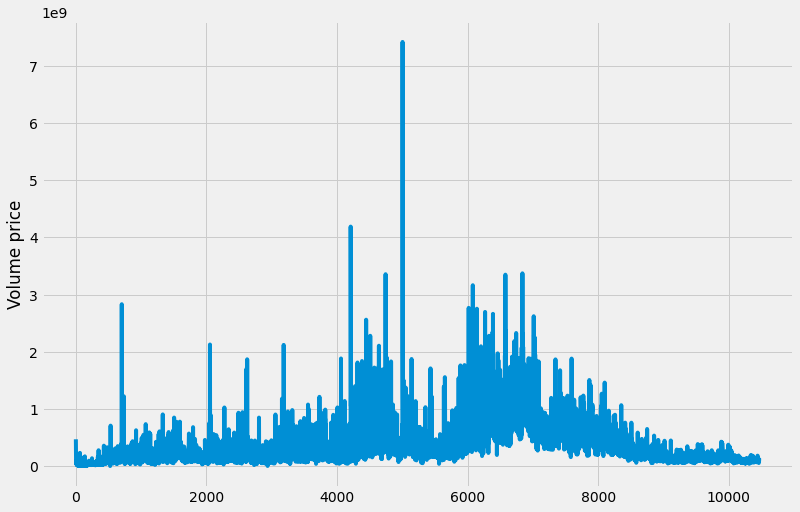

In [12]:
#Stock volume visualization
Apple_df['Volume'].plot(figsize=(12,8))
plt.ylabel("Volume price")

In [13]:
#Since the Adj Close and the volumn columns are not necessary for the forecast, let's drop then
#Let's first inspect and then drop them
Apple_df['Adj Close'].unique()
Apple_df['Volume'].unique()
#Apple_df = Apple_df.drop(columns='Volume')
Apple_df.drop(columns='Adj Close', inplace=True)

In [14]:
#Setting the 'Date' column as index
Apple_df.set_index("Date", inplace=True) 
Apple_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


# **Plots and Analysis**

Text(0.5, 1.0, 'Total Portfolio Value')

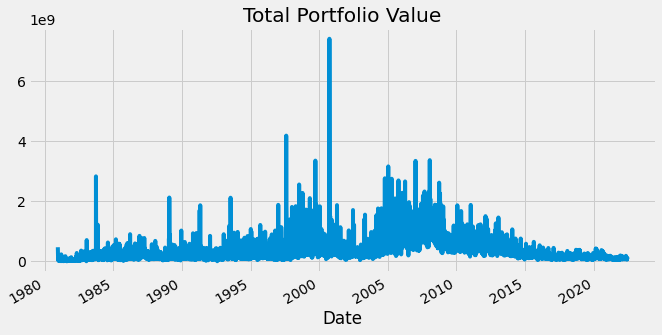

In [15]:
#Total Portfolio Value visualization
Apple_df['Total Portfolio'] = Apple_df.sum(axis=1)
Apple_df['Total Portfolio'].plot(figsize=(10,5))
plt.title('Total Portfolio Value')


# Apple Stock between 1980 and 2000

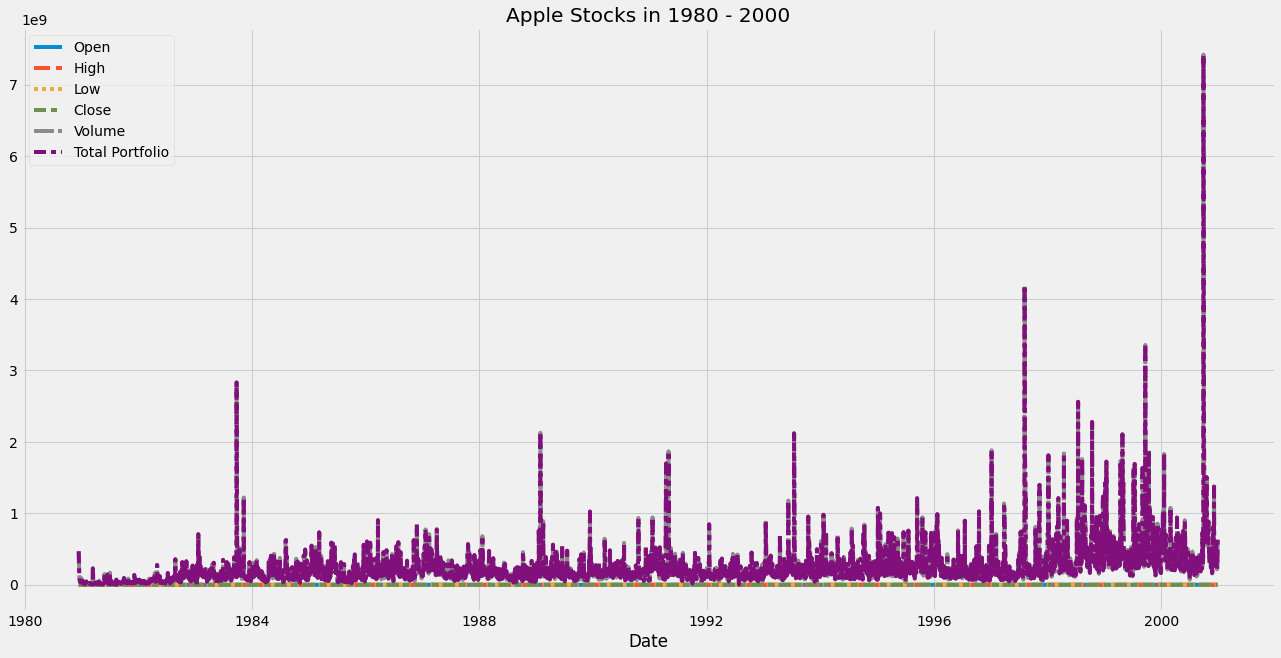

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(data=Apple_df.loc['1980-12-12':'2000-12-31'])
plt.title('Apple Stocks in 1980 - 2000')
plt.show()

# Apple Stock between 2001 and 2010

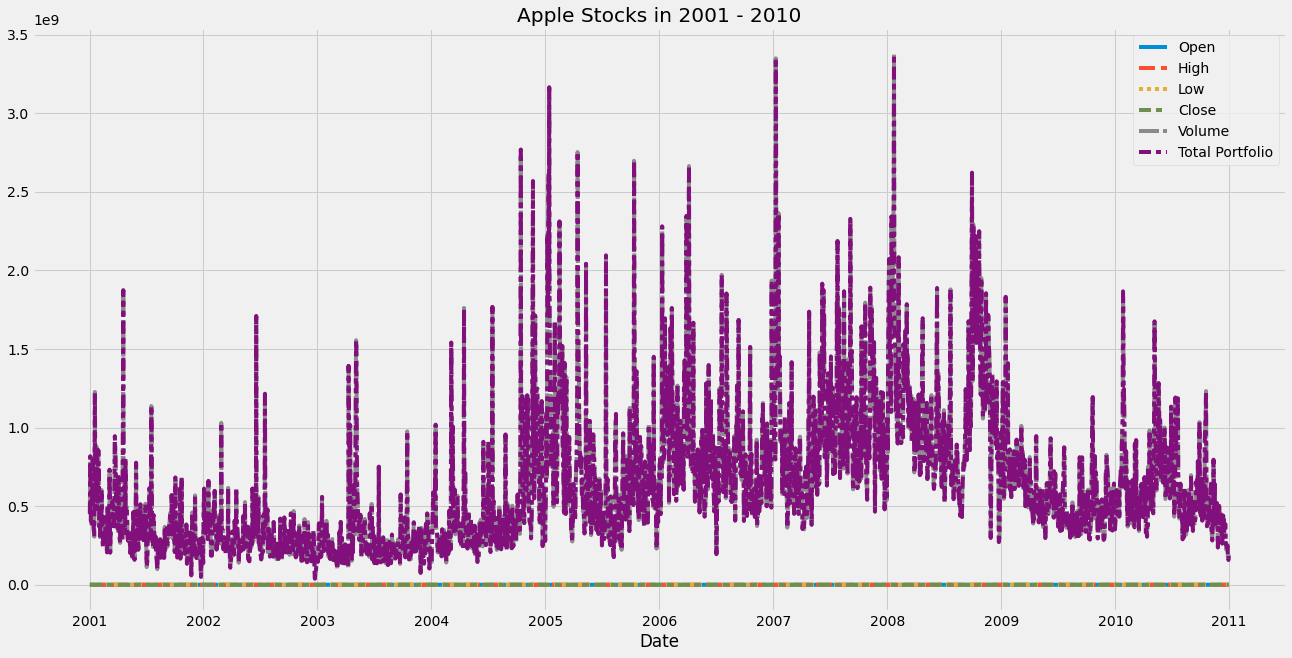

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(data=Apple_df.loc['2001-01-01':'2010-12-31'])
plt.title('Apple Stocks in 2001 - 2010')
plt.show()

# Apple Stock between 2010 and 2021

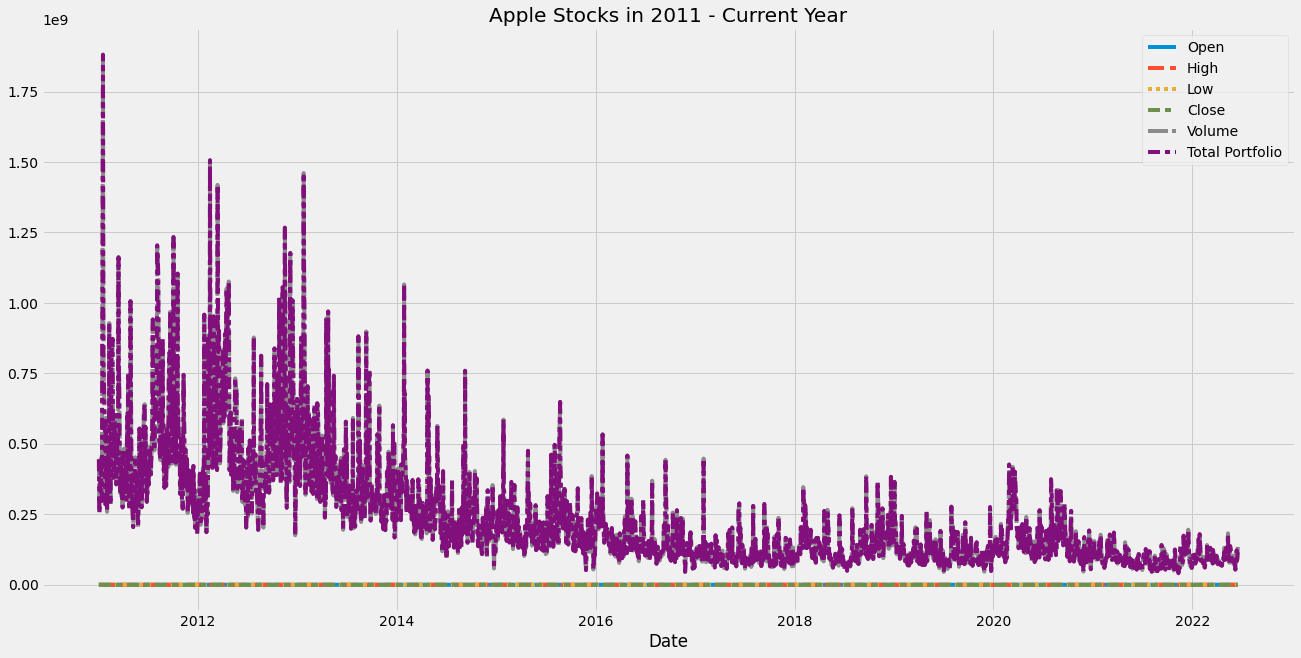

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(data=Apple_df.loc['2011-01-01':])
plt.title('Apple Stocks in 2011 - Current Year')
plt.show()

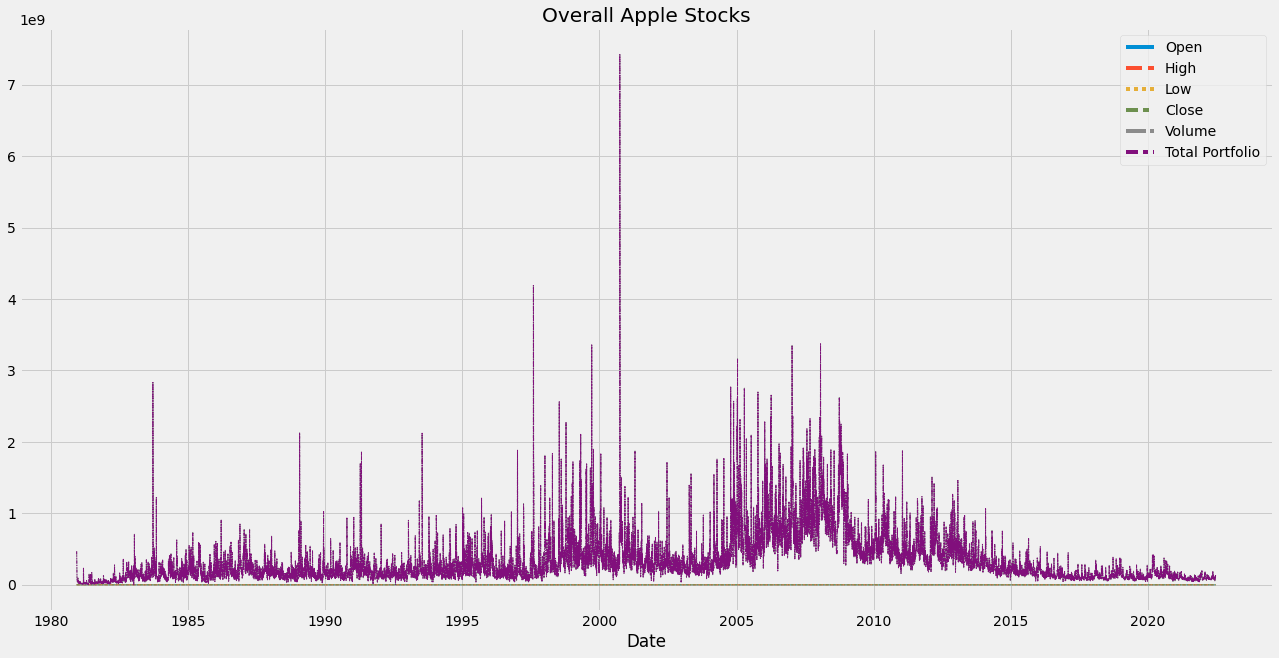

In [19]:
#Overall Apple Stock Visualization
plt.figure(figsize=(20,10))
sns.lineplot(data=Apple_df, linewidth=1)
plt.title('Overall Apple Stocks')
plt.show()

# Resampling the data

In [20]:
Apple_df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Total Portfolio
Date,,,,,,
1980-12-31,0.136075,0.136461,0.135903,0.135903,1.034501e+08,1.034501e+08
1981-12-31,0.108883,0.109265,0.108548,0.108548,3.239899e+07,3.239899e+07
1982-12-31,0.085446,0.086665,0.084630,0.085459,8.444667e+07,8.444667e+07
1983-12-31,0.167274,0.171085,0.163449,0.167274,1.759408e+08,1.759408e+08
1984-12-31,0.119956,0.122294,0.117642,0.119651,1.659250e+08,1.659250e+08
1985-12-31,0.091057,0.092023,0.089937,0.090233,1.805249e+08,1.805249e+08
1986-12-31,0.144586,0.147048,0.142207,0.144913,2.107637e+08,2.107637e+08
1987-12-31,0.347817,0.355806,0.339820,0.347751,2.362502e+08,2.362502e+08
1988-12-31,0.371034,0.376663,0.365092,0.370884,1.632134e+08,1.632134e+08


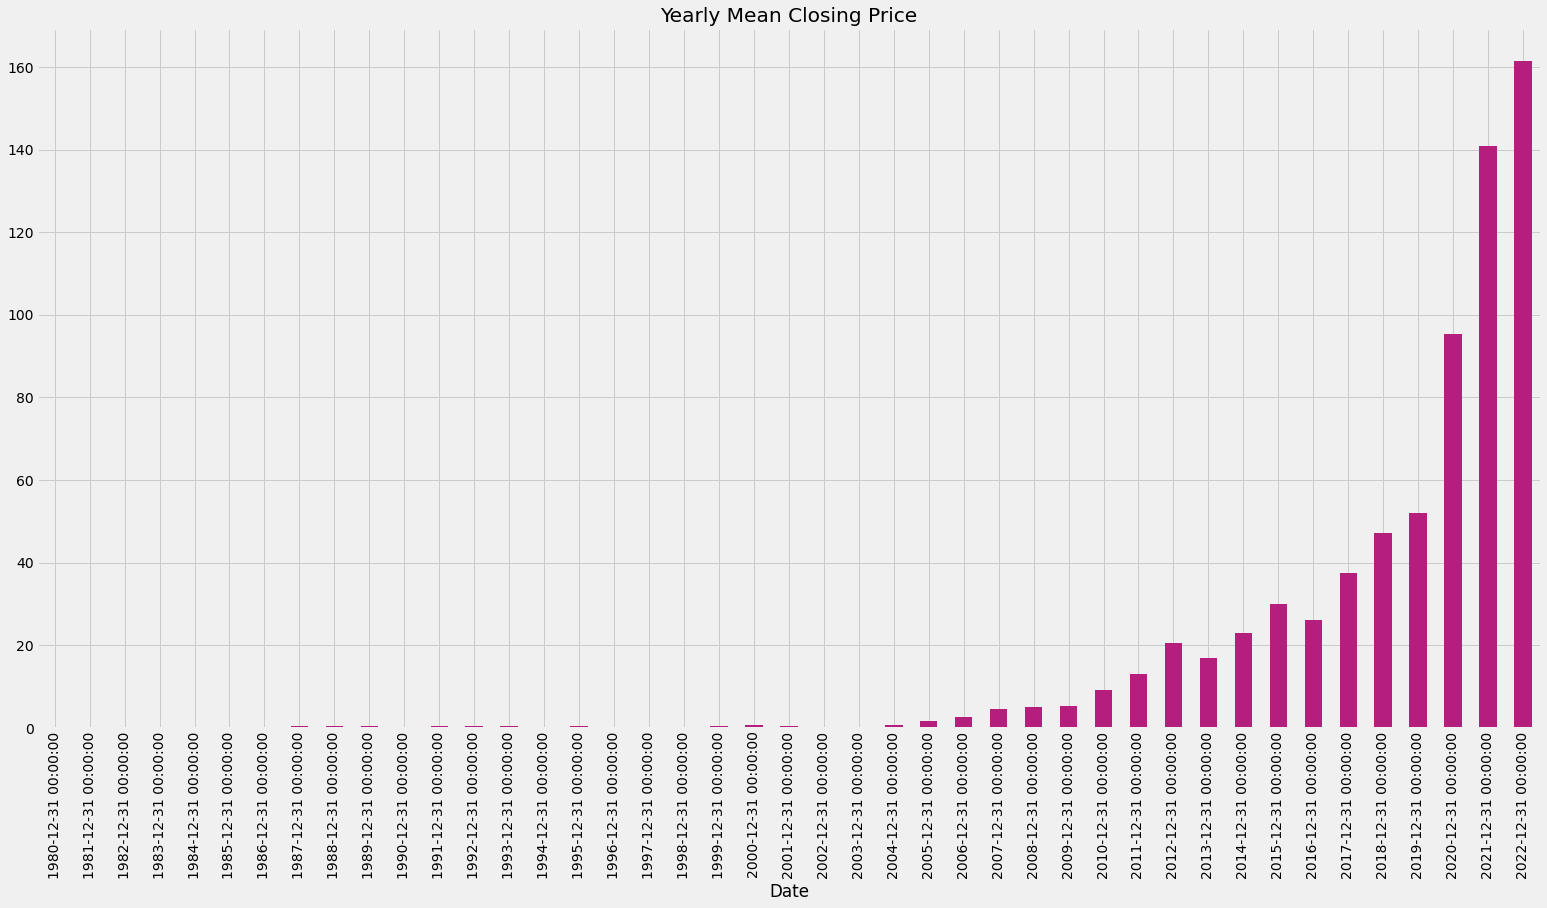

In [21]:
title = 'Yearly Mean Closing Price'
Apple_df['Open'].resample('A').mean().plot.bar(title=title,color=['#b41f7d'] , figsize=(24,12));

In [22]:
plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

import warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Prepare for model training
Apple_df['EWMA12'] = Apple_df['Open'].ewm(span=14,adjust=True).mean()

span = 8
alpha = 2/(span+1)

Apple_df['EWMA12'] = Apple_df['Open'].ewm(alpha=alpha,adjust=False).mean()

model=SimpleExpSmoothing(Apple_df["Open"])

In [24]:
model=SimpleExpSmoothing(Apple_df["Open"])
model.fit(smoothing_level=alpha,optimized=False)
fitted_model=model.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

Date
1980-12-12      0.128348
1980-12-15      0.128348
1980-12-16      0.126984
1980-12-17      0.123939
1980-12-18      0.122066
                 ...    
2022-06-13    145.143412
2022-06-14    142.415986
2022-06-15    140.352435
2022-06-16    139.005226
2022-06-17    137.466287
Length: 10468, dtype: float64

In [25]:
fitted_model.fittedvalues.shift(-1)

Date
1980-12-12      0.128348
1980-12-15      0.126984
1980-12-16      0.123939
1980-12-17      0.122066
1980-12-18      0.121354
                 ...    
2022-06-13    142.415986
2022-06-14    140.352435
2022-06-15    139.005226
2022-06-16    137.466287
2022-06-17           NaN
Length: 10468, dtype: float64

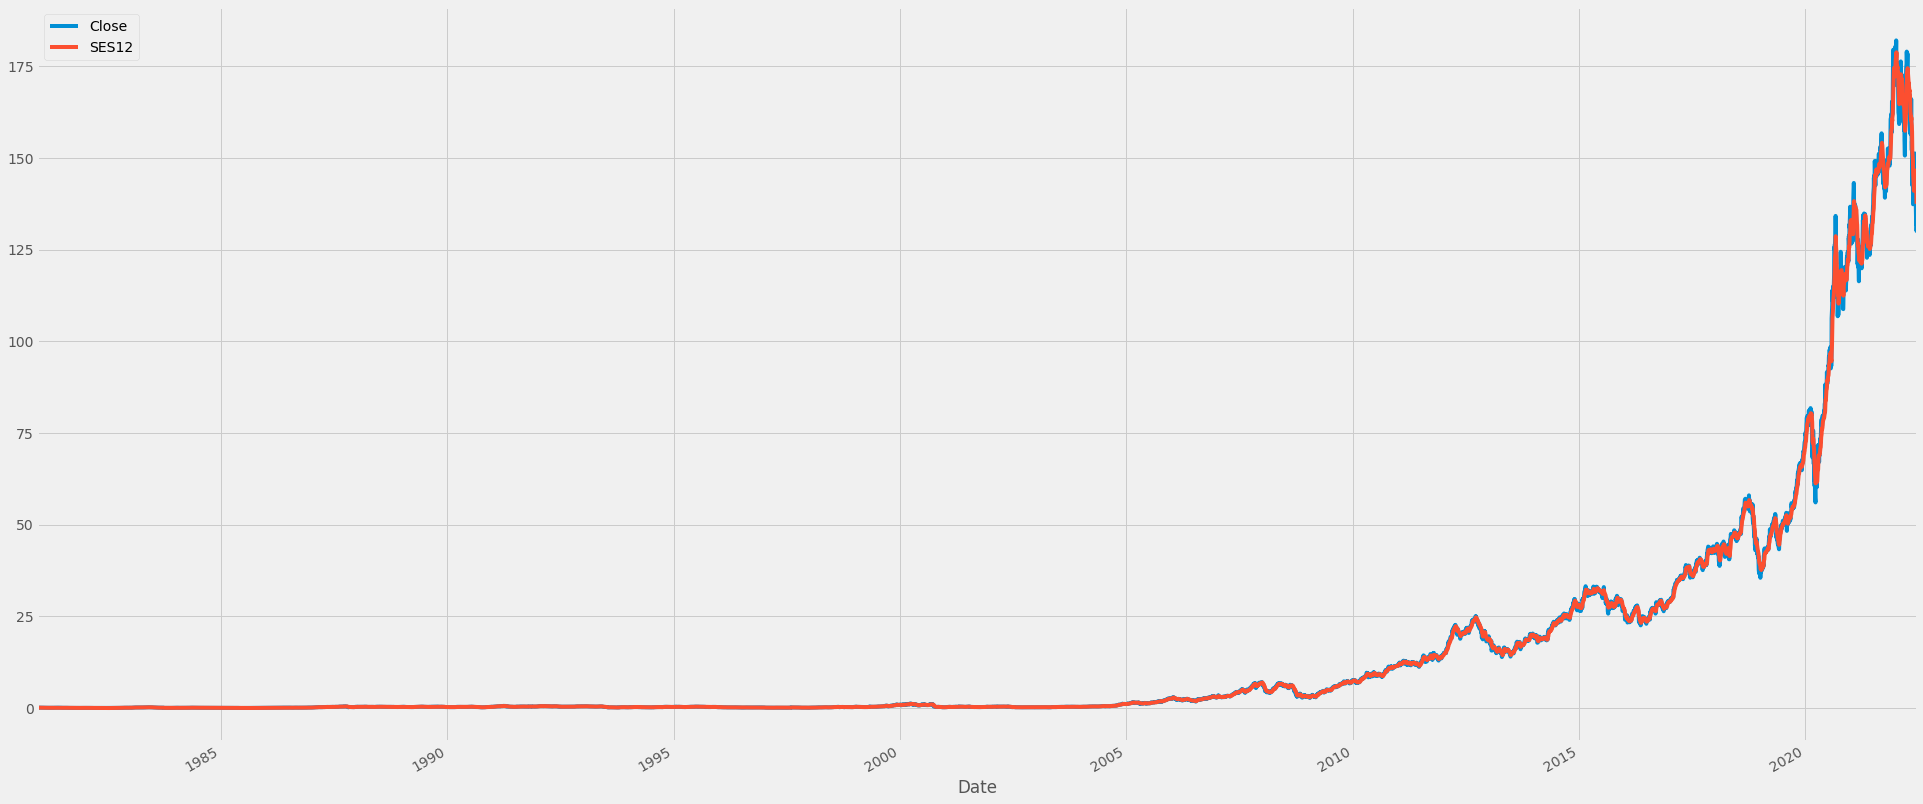

In [26]:
Apple_df["SES12"]=fitted_model.fittedvalues.shift(-1)
Apple_df[['Close',"SES12"]].plot(figsize=(30,15)).autoscale(axis='x',tight=True);

In [27]:
Apple_df['DESadd12'] = ExponentialSmoothing(Apple_df['Open'], trend='add').fit().fittedvalues.shift(-1)
Apple_df.head()

,Open,High,Low,Close,Volume,Total Portfolio,EWMA12,SES12,DESadd12
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,4.690336e+08,0.128348,0.128348,0.128941
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,1.758848e+08,0.126984,0.126984,0.123321
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,1.057280e+08,0.123939,0.123939,0.114627
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,8.644160e+07,0.122066,0.122066,0.116067
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,7.344960e+07,0.121354,0.121354,0.119279


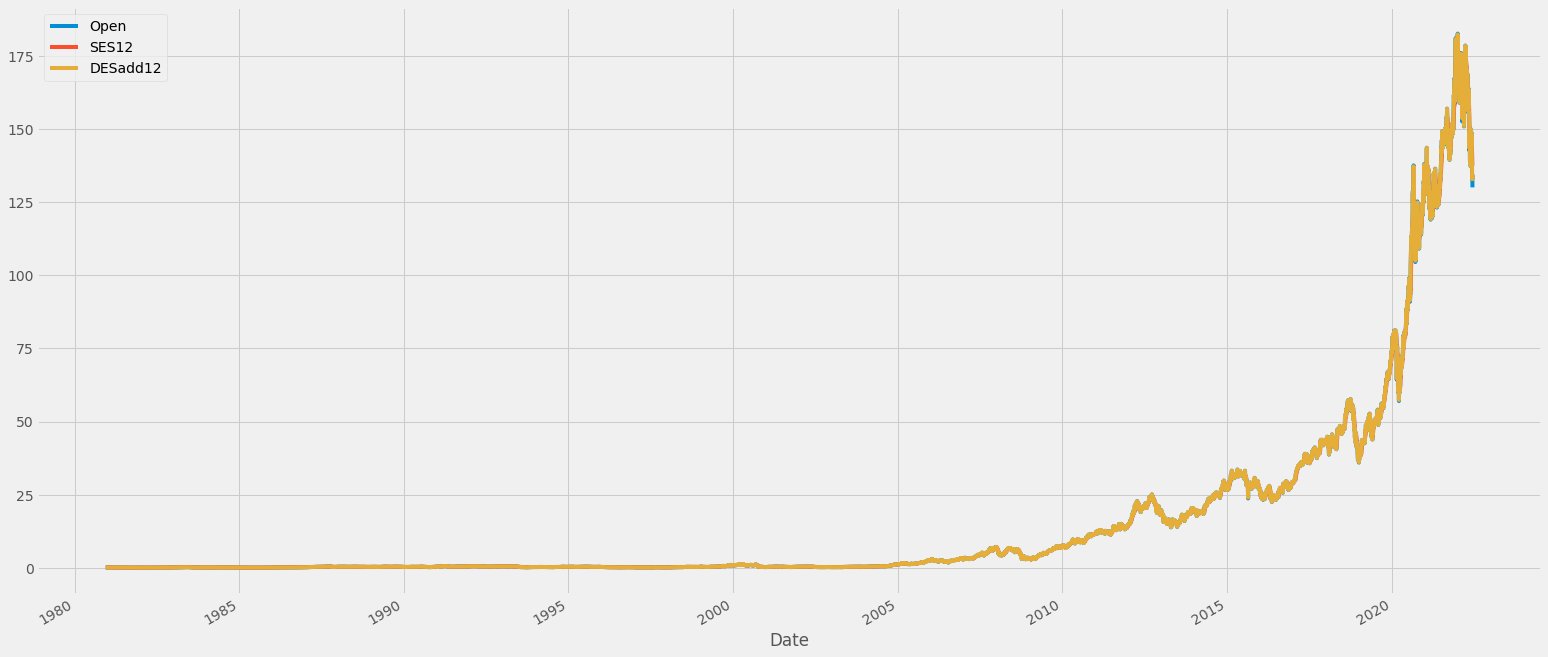

In [28]:
Apple_df[['Open',  'SES12', 'DESadd12']].plot(figsize=(24,12))

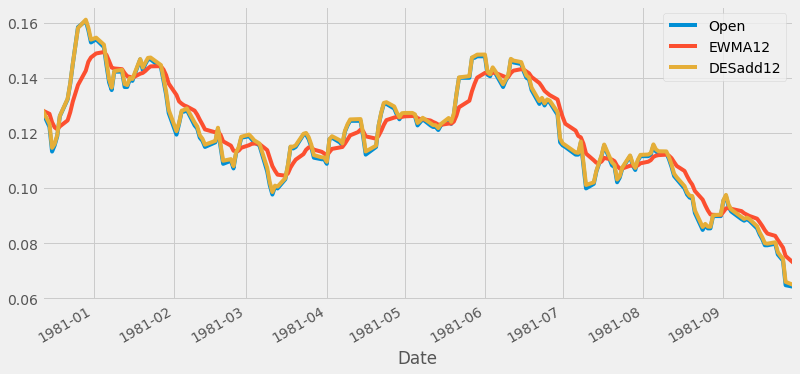

In [29]:
Apple_df[['Open','EWMA12','DESadd12']].iloc[:200].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [30]:
Apple_df['DESmul12'] = ExponentialSmoothing(Apple_df['Open'], trend='mul').fit().fittedvalues.shift(-1)
Apple_df.head()

,Open,High,Low,Close,Volume,Total Portfolio,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,4.690336e+08,0.128348,0.128348,0.128941,0.117926
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,1.758848e+08,0.126984,0.126984,0.123321,0.112388
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,1.057280e+08,0.123939,0.123939,0.114627,0.104369
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,8.644160e+07,0.122066,0.122066,0.116067,0.105797
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,7.344960e+07,0.121354,0.121354,0.119279,0.108775


In [32]:
Apple_df['TESadd12'] = ExponentialSmoothing(Apple_df['Open'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
Apple_df.head()

,Open,High,Low,Close,Volume,Total Portfolio,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,4.690336e+08,0.128348,0.128348,0.128941,0.117926,0.125321
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,1.758848e+08,0.126984,0.126984,0.123321,0.112388,0.157858
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,1.057280e+08,0.123939,0.123939,0.114627,0.104369,0.099397
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,8.644160e+07,0.122066,0.122066,0.116067,0.105797,0.140957
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,7.344960e+07,0.121354,0.121354,0.119279,0.108775,0.123268


In [33]:
Apple_df['TESmul12'] = ExponentialSmoothing(Apple_df['Open'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
Apple_df.head()

,Open,High,Low,Close,Volume,Total Portfolio,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,4.690336e+08,0.128348,0.128348,0.128941,0.117926,0.125321,0.005575
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,1.758848e+08,0.126984,0.126984,0.123321,0.112388,0.157858,0.167361
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,1.057280e+08,0.123939,0.123939,0.114627,0.104369,0.099397,0.005502
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,8.644160e+07,0.122066,0.122066,0.116067,0.105797,0.140957,0.003771
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,7.344960e+07,0.121354,0.121354,0.119279,0.108775,0.123268,0.008550


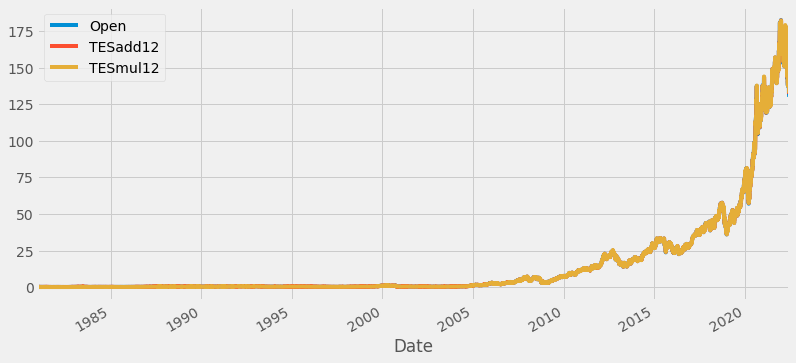

In [34]:
Apple_df[['Open','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

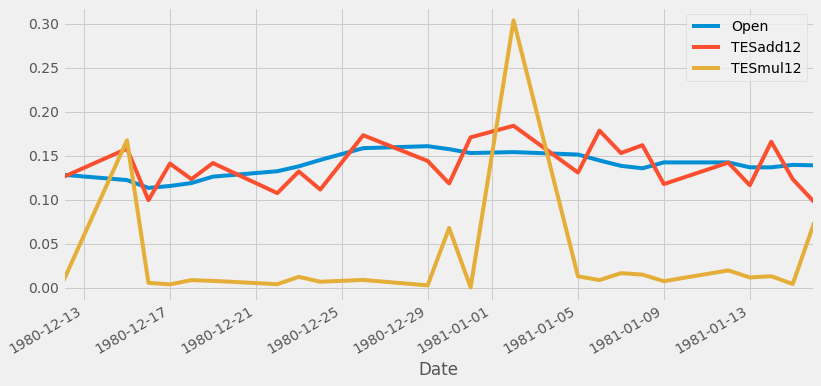

In [35]:
Apple_df[['Open','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Prepare data for model training

In [36]:
Apple_df = Apple_df.filter(['Open'])

Apple_df1 = Apple_df.values

Apple_train_data_len = int(np.ceil( len(Apple_df1) * .95 ))

Apple_train_data_len

9945

In [37]:
Apple_scaler = MinMaxScaler(feature_range=(0,1))
Apple_scaled_data = Apple_scaler.fit_transform(Apple_df1)
Apple_scaled_data

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [7.35239774e-01],
       [7.23135563e-01],
       [7.12126738e-01]])

In [67]:
Apple_train_data = Apple_scaled_data[0:int(Apple_train_data_len), :]

x_train = []
y_train = []

for i in range(60, len(Apple_train_data)):
    x_train.append(Apple_train_data[i-60:i, 0])
    y_train.append(Apple_train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00043095, 0.00039733, 0.00034843, 0.00036065, 0.00037899,
       0.00041873, 0.00045234, 0.00048291, 0.00052264, 0.000596  ,
       0.00060822, 0.00058988, 0.00056543, 0.00057155, 0.00055626,
       0.00051958, 0.00048597, 0.00047069, 0.00050736, 0.00050736,
       0.0004768 , 0.0004768 , 0.00049208, 0.00048902, 0.00053181,
       0.00051042, 0.00052264, 0.00053181, 0.00053181, 0.00051958,
       0.00051653, 0.00048902, 0.00046152, 0.00042484, 0.00038205,
       0.00040344, 0.00042789, 0.00042789, 0.00043095, 0.00040039,
       0.00039428, 0.00037594, 0.00036983, 0.0003576 , 0.00036676,
       0.00039428, 0.0003576 , 0.00032398, 0.00033009, 0.00031481,
       0.00034537, 0.00035454, 0.00037594, 0.00037899, 0.00037288,
       0.00036676, 0.00036371, 0.00036065, 0.0003087 , 0.00028119])]
[0.0002628486725350605]

[array([0.00043095, 0.00039733, 0.00034843, 0.00036065, 0.00037899,
       0.00041873, 0.00045234, 0.00048291, 0.00052264, 0.000596  ,
       0.00060822, 0.00058988, 0.

In [68]:
Apple_test_data = Apple_scaled_data[Apple_train_data_len- 60: , :]
x_test = []
y_test = Apple_df1[Apple_train_data_len:, :]
for i in range(60, len(Apple_test_data)):
    x_test.append(Apple_test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# **Training the Xgboost model**

In [52]:
Apple_reg = xgb.XGBRegressor(n_estimators=1000)
Apple_reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=100,
       verbose= True) # Change verbose to True if you want to see it train

[11:00:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.415477	validation_1-rmse:137.712
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.373972	validation_1-rmse:137.721
[2]	validation_0-rmse:0.336613	validation_1-rmse:137.729
[3]	validation_0-rmse:0.302987	validation_1-rmse:137.736
[4]	validation_0-rmse:0.272722	validation_1-rmse:137.74
[5]	validation_0-rmse:0.24548	validation_1-rmse:137.746
[6]	validation_0-rmse:0.22096	validation_1-rmse:137.752
[7]	validation_0-rmse:0.198888	validation_1-rmse:137.755
[8]	validation_0-rmse:0.17902	validation_1-rmse:137.757
[9]	validation_0-rmse:0.161137	validation_1-rmse:137.758
[10]	validation_0-rmse:0.145042	validation_1-rmse:137.76
[11]	validation_0-rmse:0.130555	validation_1-rmse:137.763
[12]	validation_0-rmse:0.117516	

XGBRegressor(n_estimators=1000)

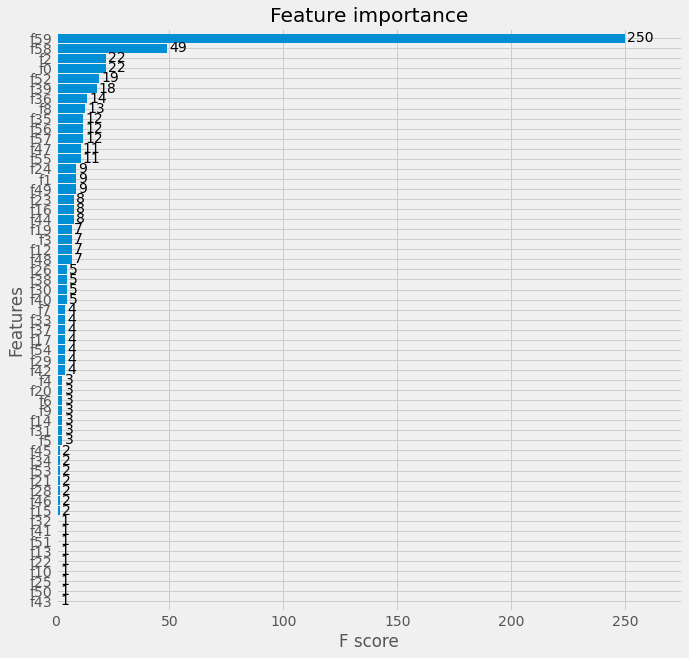

In [55]:
#Visualizing the model features
_ = plot_importance(Apple_reg, height=0.9)

# **Training the LSTM model**

In [69]:
Apple_model = Sequential()
Apple_model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
Apple_model.add(LSTM(32, return_sequences=False))
Apple_model.add(Dense(16))
Apple_model.add(Dense(1))
Apple_model.compile(optimizer='adam', loss='mean_squared_error')
Apple_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [70]:
callbacks = [EarlyStopping(patience=3, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)] 

In [73]:
Apple_history =Apple_model.fit(x_train, y_train, 
                        epochs=50,
                        batch_size=128,
                        callbacks=[callbacks],
                        )

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 1.0129e-05

78/78 [==============================] - 8s 106ms/step - loss: 1.0129e-05 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 9.9469e-06

78/78 [==============================] - 8s 100ms/step - loss: 9.9469e-06 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 9.1064e-06

78/78 [==============================] - 8s 99ms/step - loss: 9.1064e-06 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - ETA: 0s - loss: 8.7974e-06

78/78 [==============================] - 8s 98ms/step - loss: 8.7974e-06 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - ETA: 0s - loss: 1.5556e-05

78/78 [==============================] - 8s 100ms/step - loss: 1.5556e-05 - lr: 0.0010
Epoch 6/50
78/78 [==============================] - ETA: 0s - loss: 9.0281e-06

78/78 [==============================] - 8s 99ms/step - loss: 9.0281e-06 - lr: 0.0010
Epoch 7/50
78/78 [==============================] - ETA: 0s - loss: 8.5889e-06

78/78 [==============================] - 8s 99ms/step - loss: 8.5889e-06 - lr: 0.0010
Epoch 8/50
78/78 [==============================] - ETA: 0s - loss: 1.0045e-05

78/78 [==============================] - 8s 98ms/step - loss: 1.0045e-05 - lr: 0.0010
Epoch 9/50
78/78 [==============================] - ETA: 0s - loss: 1.0817e-05

78/78 [==============================] - 11s 146ms/step - loss: 1.0817e-05 - lr: 0.0010
Epoch 10/50
78/78 [==============================] - ETA: 0s - loss: 1.1072e-05

78/78 [==============================] - 10s 130ms/step - loss: 1.1072e-05 - lr: 0.0010
Epoch 11/50
78/78 [==============================] - ETA: 0s - loss: 8.4869e-06

78/78 [==============================] - 9s 115ms/step - loss: 8.4869e-06 - lr: 0.0010
Epoch 12/50
78/78 [==============================] - ETA: 0s - loss: 9.0796e-06

78/78 [==============================] - 8s 99ms/step - loss: 9.0796e-06 - lr: 0.0010
Epoch 13/50
78/78 [==============================] - ETA: 0s - loss: 1.0299e-05

78/78 [==============================] - 11s 139ms/step - loss: 1.0299e-05 - lr: 0.0010
Epoch 14/50
78/78 [==============================] - ETA: 0s - loss: 1.0422e-05

78/78 [==============================] - 11s 148ms/step - loss: 1.0422e-05 - lr: 0.0010
Epoch 15/50
78/78 [==============================] - ETA: 0s - loss: 8.8857e-06

78/78 [==============================] - 8s 99ms/step - loss: 8.8857e-06 - lr: 0.0010
Epoch 16/50
78/78 [==============================] - ETA: 0s - loss: 8.1803e-06

78/78 [==============================] - 8s 100ms/step - loss: 8.1803e-06 - lr: 0.0010
Epoch 17/50
78/78 [==============================] - ETA: 0s - loss: 7.6685e-06

78/78 [==============================] - 8s 101ms/step - loss: 7.6685e-06 - lr: 0.0010
Epoch 18/50
78/78 [==============================] - ETA: 0s - loss: 8.7755e-06

78/78 [==============================] - 8s 100ms/step - loss: 8.7755e-06 - lr: 0.0010
Epoch 19/50
78/78 [==============================] - ETA: 0s - loss: 7.4977e-06

78/78 [==============================] - 8s 99ms/step - loss: 7.4977e-06 - lr: 0.0010
Epoch 20/50
78/78 [==============================] - ETA: 0s - loss: 1.0212e-05

78/78 [==============================] - 8s 99ms/step - loss: 1.0212e-05 - lr: 0.0010
Epoch 21/50
78/78 [==============================] - ETA: 0s - loss: 7.6370e-06

78/78 [==============================] - 8s 97ms/step - loss: 7.6370e-06 - lr: 0.0010
Epoch 22/50
78/78 [==============================] - ETA: 0s - loss: 7.2577e-06

78/78 [==============================] - 10s 132ms/step - loss: 7.2577e-06 - lr: 0.0010
Epoch 23/50
78/78 [==============================] - ETA: 0s - loss: 8.3771e-06

78/78 [==============================] - 10s 132ms/step - loss: 8.3771e-06 - lr: 0.0010
Epoch 24/50
78/78 [==============================] - ETA: 0s - loss: 6.9874e-06

78/78 [==============================] - 8s 100ms/step - loss: 6.9874e-06 - lr: 0.0010
Epoch 25/50
78/78 [==============================] - ETA: 0s - loss: 7.2338e-06

78/78 [==============================] - 8s 98ms/step - loss: 7.2338e-06 - lr: 0.0010
Epoch 26/50
78/78 [==============================] - ETA: 0s - loss: 6.4124e-06

78/78 [==============================] - 8s 104ms/step - loss: 6.4124e-06 - lr: 0.0010
Epoch 27/50
78/78 [==============================] - ETA: 0s - loss: 7.5405e-06

78/78 [==============================] - 8s 106ms/step - loss: 7.5405e-06 - lr: 0.0010
Epoch 28/50
78/78 [==============================] - ETA: 0s - loss: 7.0115e-06

78/78 [==============================] - 8s 102ms/step - loss: 7.0115e-06 - lr: 0.0010
Epoch 29/50
78/78 [==============================] - ETA: 0s - loss: 7.8802e-06

78/78 [==============================] - 9s 118ms/step - loss: 7.8802e-06 - lr: 0.0010
Epoch 30/50
78/78 [==============================] - ETA: 0s - loss: 7.4142e-06

78/78 [==============================] - 10s 129ms/step - loss: 7.4142e-06 - lr: 0.0010
Epoch 31/50
78/78 [==============================] - ETA: 0s - loss: 9.7210e-06

78/78 [==============================] - 8s 100ms/step - loss: 9.7210e-06 - lr: 0.0010
Epoch 32/50
78/78 [==============================] - ETA: 0s - loss: 7.6878e-06

78/78 [==============================] - 8s 100ms/step - loss: 7.6878e-06 - lr: 0.0010
Epoch 33/50
78/78 [==============================] - ETA: 0s - loss: 7.3554e-06

78/78 [==============================] - 8s 98ms/step - loss: 7.3554e-06 - lr: 0.0010
Epoch 34/50
78/78 [==============================] - ETA: 0s - loss: 7.4721e-06

78/78 [==============================] - 8s 97ms/step - loss: 7.4721e-06 - lr: 0.0010
Epoch 35/50
78/78 [==============================] - ETA: 0s - loss: 6.5752e-06

78/78 [==============================] - 8s 101ms/step - loss: 6.5752e-06 - lr: 0.0010
Epoch 36/50
78/78 [==============================] - ETA: 0s - loss: 8.4494e-06

78/78 [==============================] - 8s 99ms/step - loss: 8.4494e-06 - lr: 0.0010
Epoch 37/50
78/78 [==============================] - ETA: 0s - loss: 6.4554e-06

78/78 [==============================] - 8s 102ms/step - loss: 6.4554e-06 - lr: 0.0010
Epoch 38/50
78/78 [==============================] - ETA: 0s - loss: 5.4950e-06

78/78 [==============================] - 8s 101ms/step - loss: 5.4950e-06 - lr: 0.0010
Epoch 39/50
78/78 [==============================] - ETA: 0s - loss: 7.9242e-06

78/78 [==============================] - 8s 99ms/step - loss: 7.9242e-06 - lr: 0.0010
Epoch 40/50
78/78 [==============================] - ETA: 0s - loss: 6.7457e-06

78/78 [==============================] - 8s 104ms/step - loss: 6.7457e-06 - lr: 0.0010
Epoch 41/50
78/78 [==============================] - ETA: 0s - loss: 6.0712e-06

78/78 [==============================] - 8s 102ms/step - loss: 6.0712e-06 - lr: 0.0010
Epoch 42/50
78/78 [==============================] - ETA: 0s - loss: 6.7124e-06

78/78 [==============================] - 8s 105ms/step - loss: 6.7124e-06 - lr: 0.0010
Epoch 43/50
78/78 [==============================] - ETA: 0s - loss: 6.3756e-06

78/78 [==============================] - 9s 119ms/step - loss: 6.3756e-06 - lr: 0.0010
Epoch 44/50
78/78 [==============================] - ETA: 0s - loss: 5.7086e-06

78/78 [==============================] - 8s 106ms/step - loss: 5.7086e-06 - lr: 0.0010
Epoch 45/50
78/78 [==============================] - ETA: 0s - loss: 5.5444e-06

78/78 [==============================] - 8s 104ms/step - loss: 5.5444e-06 - lr: 0.0010
Epoch 46/50
78/78 [==============================] - ETA: 0s - loss: 6.0410e-06

78/78 [==============================] - 8s 103ms/step - loss: 6.0410e-06 - lr: 0.0010
Epoch 47/50
78/78 [==============================] - ETA: 0s - loss: 5.3224e-06

78/78 [==============================] - 8s 102ms/step - loss: 5.3224e-06 - lr: 0.0010
Epoch 48/50
78/78 [==============================] - ETA: 0s - loss: 6.9508e-06

78/78 [==============================] - 8s 102ms/step - loss: 6.9508e-06 - lr: 0.0010
Epoch 49/50
78/78 [==============================] - ETA: 0s - loss: 5.8154e-06

78/78 [==============================] - 8s 100ms/step - loss: 5.8154e-06 - lr: 0.0010
Epoch 50/50
78/78 [==============================] - ETA: 0s - loss: 5.0663e-06

78/78 [==============================] - 8s 99ms/step - loss: 5.0663e-06 - lr: 0.0010


In [74]:
#Making Predictions
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = Apple_model.predict(x_test)
predictions = Apple_scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
print(mean_absolute_error(y_test, predictions))

4.7967036483180125
3.775822668412218


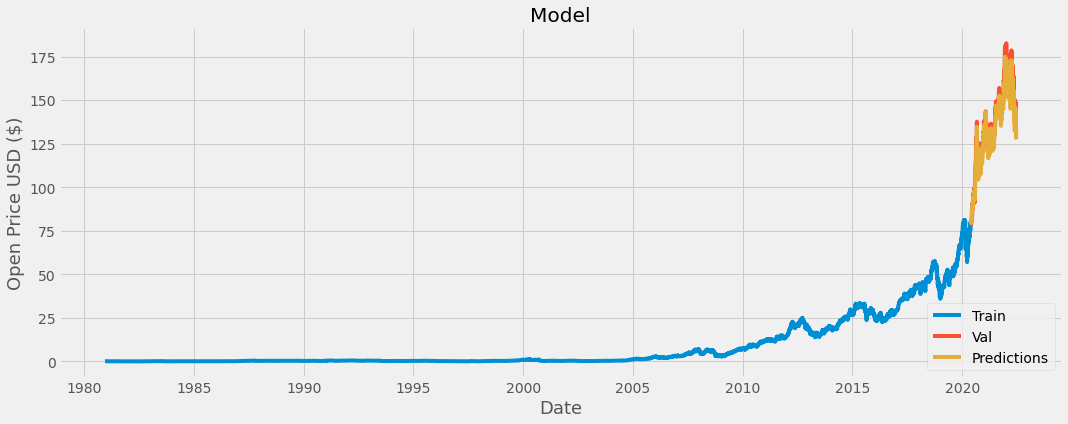

In [75]:
# Plot the data
train = Apple_df [:Apple_train_data_len]
valid = Apple_df [Apple_train_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

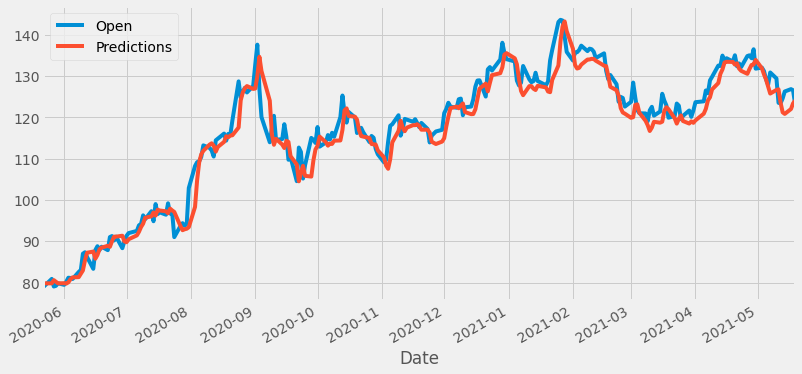

In [76]:
valid[['Open','Predictions']].iloc[:250].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# **Conclussion**
In this project, I have demonstrated how to use Xgboost and LSTM models to forecast stock price.